<a href="https://colab.research.google.com/github/YuliaMeshcheryakova/cmpAL/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Math
import numpy as np

Определяем функцию для создания узла дерева для хранения целых чисел

In [2]:
def integer_(x: int) -> tuple:
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

ID(x) - возвращает идентификатор узла

items(x) - возвращает список дочерних узлов

options(x) - возвращает словарь с параметрами узла

isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов

In [3]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1 :-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(items(x))==0

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

Определяем функции для преобразования узла в LaTeX-выражение

In [4]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

Определяем функцию show_ для визуализации формулы, представленной деревом x

In [5]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(integer_(-123))
print(-123)

<IPython.core.display.Math object>

-123


In [6]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma','delta', 'epsilon', 'zeta', 'eta', 'theta',
           'iota', 'kappa', 'lambda', 'mu', 'nu', 'xi', 'o', 'pi', 'rho', 'sigma',
           'tau', 'upsilon', 'phi', 'chi', 'psi', 'omega',
           'A', 'B', 'Gamma', 'Delta', 'varepsilon', 'Epsilon', 'Z', 'H', 'vartheta', 'Theta',
           'I', 'K', 'Lambda', 'M', 'N', 'Xi', 'O', 'Pi', 'varrho', 'P', 'Sigma',
           'T', 'Upsilon', 'varphi', 'Phi', 'X', 'Psi', 'Omega',]
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha = symbol_('x_1'), symbol_('alpha')
show_(x)
show_(alpha)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
def add_(x: tuple, y: tuple) -> tuple:
  return 'add', x, y, {}

def sub_(x: tuple, y: tuple) -> tuple:
  return 'sub', x, y, {}

def mul_(x: tuple, y: tuple) -> tuple:
  return 'mul', x, y, {}

def div_(x: tuple, y: tuple) -> tuple:
  return 'div', x, y, {}

def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}

def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}

def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}

def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}

def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}

def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}

def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}

def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}

def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}

def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}

def neg_(x: tuple) -> tuple:
  return 'neg', x, {}

def inv_(x: tuple) -> tuple:
  return 'inv', x, {}

In [8]:
a = integer_(34)
x = symbol_('x')
y = symbol_('y')
f = mul_(add_(a, x), y)
print(f)

('mul', ('add', ('integer', {'value': 34}), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {})


In [9]:
priority = {'deg': 9, 'neg': 8, 'mul': 7, 'div': 7, 'add' : 6, 'and': 5, 'xor': 4, 'or': 3, 'eq': 2, 'ne': 2, 'lt': 2, 'le': 2, 'gt': 2, 'ge': 2, 'inv': 1}

def Pr(x: tuple) -> int:
  return priority.get(ID(x), 10)

print(Pr(f))

7


In [10]:
def enclose(x: str) -> str:
  return f"\\left( {x} \\right)"

In [11]:
def latex_add(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} + {{{b}}}"

def latex_mul(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \\cdot {{{b}}}"

def latex_div(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  return f"\\frac{{{a}}}{{{b}}}"

def latex_sub(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} - {{{b}}}"

def latex_deg(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}}^{{{b}}}"

def latex_inv(x: tuple) -> str:
  a = latex_(x[1])
  if options(x[1]).get('value', 1)<0 or ID(x[1])=='neg':
    a = enclose(a)
  return f"\\neg {{{a}}}"

def latex_neg(x: tuple) -> str:
  a = latex_(x[1])
  if options(x[1]).get('value', 1)<0 or ID(x[1])=='neg':
    a = enclose(a)
  return f" -{{{a}}}"

def latex_and(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \wedge {{{b}}}"

def latex_or(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \vee {{{b}}}"

def latex_xor(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{a} \oplus {b}"

def latex_eq(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} = {{{b}}}"

def latex_ne(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\neq {{{b}}}"

def latex_lt(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} < {{{b}}}"

def latex_le(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\leq {{{b}}}"

def latex_gt(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} > {{{b}}}"

def latex_ge(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\geq {{{b}}}"

In [12]:
a = integer_(34)
y = integer_(10)
x = symbol_('x')
f = mul_(add_(a, y), y)
show_(f)

show_(neg_(integer_(-11)))
show_(deg_(x, integer_(-1)))
show_( div_(mul_(add_(a, y), y), neg_(y)))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
class Expression:
  def __init__(self, x):
    self.T = x

  def __add__(self, x):
    return Expression(add_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __truediv__(self, x):
    return Expression(div_(self.T, fix(x).T))

  def __sub__(self, x):
    return Expression(sub_(self.T, fix(x).T))

  def __pow__(self, x):
    return Expression(deg_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __and__(self, x):
    return Expression(and_(self.T, fix(x).T))

  def __or__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __xor__(self, x):
    return Expression(xor_(self.T, fix(x).T))

  def __eq__(self, x):
    return Expression(eq_(self.T, fix(x).T))

  def __lt__(self, x):
    return Expression(lt_(self.T, fix(x).T))

  def __le__(self, x):
    return Expression(le_(self.T, fix(x).T))

  def __gt__(self, x):
    return Expression(gt_(self.T, fix(x).T))

  def __ge__(self, x):
    return Expression(ge_(self.T, fix(x).T))

  def __neg__(self, x):
    return Expression(neg_(self.T))

  def __invert__(self, x):
    return Expression(inv_(self.T))

  def __radd__(self, x):
    return Expression(add_(fix(x).T, self.T))

  def __rsub__(self, x):
    return Expression(sub_(fix(x).T, self.T))

  def __rmul__(self, x):
    return Expression(mul_(fix(x).T, self.T))

  def __rtruediv__(self, x):
    return Expression(div_(fix(x).T, self.T))

  def __rpow__(self, x):
    return Expression(deg_(fix(x).T, self.T))

  def __rand__(self, x):
    return Expression(and_(fix(x).T, self.T))

  def __ror__(self, x):
    return Expression(or_(fix(x).T, self.T))

  def __rxor__(self, x):
    return Expression(xor_(fix(x).T, self.T))

def fix(x):
  if isinstance(x, int):
    return Expression(integer_(x))
  return x



Создаем обертки для функций integer_ и symbol_
опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: x, y, z = symbols('x y z')

In [14]:
def Z(x: int) -> Expression:
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  return Expression(symbol_(x))

def symbols(x: str) -> Expression:
  a = x.split()
  for i in range(len(a)):
     a[i] = Expression(symbol_(a[i]))
  return a

Определяем функцию show вывода выражений, заданных классом Expression
протестируйте работу всех функций на различных выражениях

In [15]:
def show(x: Expression) -> None:
  show_(x.T)

In [16]:
a, x = Z(13), symbol('x_2')

show(a / x ** a)

<IPython.core.display.Math object>

<ipython-input-18-1e3c6b446c2a>:24: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


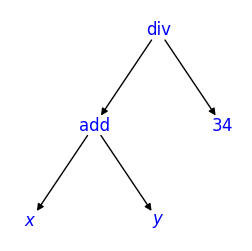

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

def makeGraph(x: tuple, nodes: list, labels: list, links: list) -> int:
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    labels[id_] = f'${latex_(x)}$'
  else:
    labels[id_] = x[0]
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, labels, links)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  nodes, labels, links = [], {}, []
  makeGraph(x, nodes, labels, links)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(3 * size, 3 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "blue")

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
drawGraph((x + y) / Z(34))